## BCycle Starter Code

In the following notebook, we have provided several examples of types of exploratory analysis we would do on these datasets. They are by no means exhaustive, but it should provide with code to do similar/further work!

## Getting the data from Blob Storage
Our data is stored inside of Azure Blob Storage. Following is the code to get it to your notebook.

In [9]:
# If you are running this code on your own computer, uncomment the following line.
# !pip install azure

In [10]:
from azure.storage.blob import BlockBlobService
import os

In [11]:
# You should only run this code once.
!mkdir bcycle

mkdir: cannot create directory ‘bcycle’: File exists


In [12]:
local_path=os.getcwd() + "/bcycle" # Where the data will be stored.
blob_account_name = "mldsdatahack2019diag" # Don't edit!
blob_account_key = "JsauBssnY92CeD3MgI2SWhkQ16JioJCRWVW8NzKtcWckI+DaNNbCmpmMAVq27GD91mhgH+oHPx+QbIKUCow5gA=="  # Don't edit!

mycontainer = "datahackdata2019"       # Don't edit!

In [13]:
import azure
from azure.storage.blob import BlockBlobService

# Create a client to get data
blob_service = BlockBlobService(account_name=blob_account_name, account_key=blob_account_key)
# Get the data
blob_service.get_blob_to_path("datahackdata2019", "BCycleAustin.csv", os.path.join(local_path, "BCycleAustin.csv"))

## Load Data

In [14]:
# Yo should see BCycleAustin.csv
!ls bcycle

BCycleAustin.csv


In [15]:
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
# Read in data
df = pd.read_csv('bcycle/BCycleAustin.csv')

In [17]:
# See the first few rows.
df.head()
df.tail()

,Trip ID,Membership Type,Bicycle ID,Checkout Kiosk ID,Checkout Kiosk,Return Kiosk ID,Return Kiosk,Trip Duration Minutes,Checkout DateTime,Checkout Latitude,Checkout Longitude,Return Latitude,Return Longitude
1027706,18898725,24 Hour Walk Up Pass,2722.0,4059.0,Nash Hernandez @ RBJ South,4059.0,Nash Hernandez @ RBJ South,65,2018-10-28 17:53:10,30.25189,-97.73323,30.25189,-97.73323
1027707,18899242,24 Hour Walk Up Pass,2344.0,4059.0,Nash Hernandez @ RBJ South,4059.0,Nash Hernandez @ RBJ South,58,2018-10-28 18:59:10,30.25189,-97.73323,30.25189,-97.73323
1027708,18899249,24 Hour Walk Up Pass,861.0,4059.0,Nash Hernandez @ RBJ South,4059.0,Nash Hernandez @ RBJ South,58,2018-10-28 18:59:53,30.25189,-97.73323,30.25189,-97.73323
1027709,18908726,24 Hour Walk Up Pass,409.0,4059.0,Nash Hernandez @ RBJ South,4059.0,Nash Hernandez @ RBJ South,48,2018-10-30 11:03:18,30.25189,-97.73323,30.25189,-97.73323
1027710,18908756,24 Hour Walk Up Pass,102.0,4059.0,Nash Hernandez @ RBJ South,4059.0,Nash Hernandez @ RBJ South,44,2018-10-30 11:07:05,30.25189,-97.73323,30.25189,-97.73323


## Calculate mean time

In [18]:
df1=df.loc[df['Trip Duration Minutes'] >= 1]
df1


,Trip ID,Membership Type,Bicycle ID,Checkout Kiosk ID,Checkout Kiosk,Return Kiosk ID,Return Kiosk,Trip Duration Minutes,Checkout DateTime,Checkout Latitude,Checkout Longitude,Return Latitude,Return Longitude
0,9900285854,Annual (San Antonio B-cycle),207.0,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,76,2014-10-26 13:12:00,30.27041,-97.75046,30.25579,-97.73982
1,9900288020,24-Hour Kiosk (Austin B-cycle),190.0,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,12,2014-10-30 19:12:00,30.27041,-97.75046,30.25579,-97.73982
2,9900289011,Local365,190.0,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,9,2015-10-01 19:12:27,30.27041,-97.75046,30.25579,-97.73982
3,9900292552,Walk Up,354.0,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,14,2015-10-04 13:12:41,30.27041,-97.75046,30.25579,-97.73982
4,9900293709,Local365,20.0,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,11,2015-10-04 13:12:56,30.27041,-97.75046,30.25579,-97.73982
5,9900294584,Local365,133.0,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,10,2015-10-05 17:12:13,30.27041,-97.75046,30.25579,-97.73982
6,9900295170,Local365,134.0,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,9,2015-10-06 18:12:47,30.27041,-97.75046,30.25579,-97.73982
7,9900296123,Local365,232.0,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,11,2015-10-08 17:12:56,30.27041,-97.75046,30.25579,-97.73982
8,9900297717,Local365,439.0,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,9,2015-10-09 22:12:48,30.27041,-97.75046,30.25579,-97.73982
9,9900302356,Local365,95.0,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,9,2015-10-12 17:12:06,30.27041,-97.75046,30.25579,-97.73982


In [20]:
mean1=df1.loc[:,'Trip Duration Minutes'].mean()
mean1

27.37286573217801

In [25]:
mean0=df.loc[:,'Trip Duration Minutes'].mean()
mean0


26.87167890584026

In [35]:
dfd=df.loc[df['Trip Duration Minutes']>10000]
dfd

,Trip ID,Membership Type,Bicycle ID,Checkout Kiosk ID,Checkout Kiosk,Return Kiosk ID,Return Kiosk,Trip Duration Minutes,Checkout DateTime,Checkout Latitude,Checkout Longitude,Return Latitude,Return Longitude
730545,10100370,Walk Up,127.0,2537.0,West & 6th St.,2504.0,South Congress & Elizabeth,10981,2016-05-22 06:27:11,30.27041,-97.75046,30.24891,-97.75019


In [41]:
q = df["Trip Duration Minutes"].quantile(0.99)
q

219.0

In [63]:
# calculate summary statistics
data_mean, data_std = df.loc[:,'Trip Duration Minutes'].mean(), df.loc[:,'Trip Duration Minutes'].std()
# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
print("cut_off:")
print(cut_off)
print("mean time:")
print(data_mean)
print("upper edge:")
print(upper)

cut_off:
226.60907104105638
mean time:
26.87167890584026
upper edge:
253.48074994689665


In [44]:
dfclean = df.loc[df['Trip Duration Minutes']<cut_off] 
dfclean

,Trip ID,Membership Type,Bicycle ID,Checkout Kiosk ID,Checkout Kiosk,Return Kiosk ID,Return Kiosk,Trip Duration Minutes,Checkout DateTime,Checkout Latitude,Checkout Longitude,Return Latitude,Return Longitude
0,9900285854,Annual (San Antonio B-cycle),207.0,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,76,2014-10-26 13:12:00,30.27041,-97.75046,30.25579,-97.73982
1,9900288020,24-Hour Kiosk (Austin B-cycle),190.0,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,12,2014-10-30 19:12:00,30.27041,-97.75046,30.25579,-97.73982
2,9900289011,Local365,190.0,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,9,2015-10-01 19:12:27,30.27041,-97.75046,30.25579,-97.73982
3,9900292552,Walk Up,354.0,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,14,2015-10-04 13:12:41,30.27041,-97.75046,30.25579,-97.73982
4,9900293709,Local365,20.0,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,11,2015-10-04 13:12:56,30.27041,-97.75046,30.25579,-97.73982
5,9900294584,Local365,133.0,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,10,2015-10-05 17:12:13,30.27041,-97.75046,30.25579,-97.73982
6,9900295170,Local365,134.0,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,9,2015-10-06 18:12:47,30.27041,-97.75046,30.25579,-97.73982
7,9900296123,Local365,232.0,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,11,2015-10-08 17:12:56,30.27041,-97.75046,30.25579,-97.73982
8,9900297717,Local365,439.0,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,9,2015-10-09 22:12:48,30.27041,-97.75046,30.25579,-97.73982
9,9900302356,Local365,95.0,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,9,2015-10-12 17:12:06,30.27041,-97.75046,30.25579,-97.73982


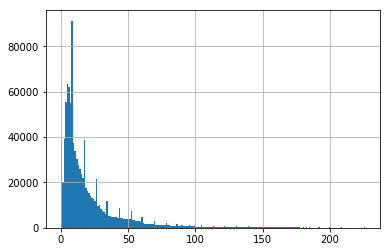

In [49]:
dfclean['Trip Duration Minutes'].hist(bins = 200)

In [52]:

dfclean['distance']=((df['Return Longitude']-df['Checkout Longitude'])**2+(df['Return Latitude']-df['Checkout Latitude'])**2)**(0.5)
dfclean

/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,Trip ID,Membership Type,Bicycle ID,Checkout Kiosk ID,Checkout Kiosk,Return Kiosk ID,Return Kiosk,Trip Duration Minutes,Checkout DateTime,Checkout Latitude,Checkout Longitude,Return Latitude,Return Longitude,distance
0,9900285854,Annual (San Antonio B-cycle),207.0,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,76,2014-10-26 13:12:00,30.27041,-97.75046,30.25579,-97.73982,0.018082
1,9900288020,24-Hour Kiosk (Austin B-cycle),190.0,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,12,2014-10-30 19:12:00,30.27041,-97.75046,30.25579,-97.73982,0.018082
2,9900289011,Local365,190.0,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,9,2015-10-01 19:12:27,30.27041,-97.75046,30.25579,-97.73982,0.018082
3,9900292552,Walk Up,354.0,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,14,2015-10-04 13:12:41,30.27041,-97.75046,30.25579,-97.73982,0.018082
4,9900293709,Local365,20.0,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,11,2015-10-04 13:12:56,30.27041,-97.75046,30.25579,-97.73982,0.018082
5,9900294584,Local365,133.0,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,10,2015-10-05 17:12:13,30.27041,-97.75046,30.25579,-97.73982,0.018082
6,9900295170,Local365,134.0,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,9,2015-10-06 18:12:47,30.27041,-97.75046,30.25579,-97.73982,0.018082
7,9900296123,Local365,232.0,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,11,2015-10-08 17:12:56,30.27041,-97.75046,30.25579,-97.73982,0.018082
8,9900297717,Local365,439.0,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,9,2015-10-09 22:12:48,30.27041,-97.75046,30.25579,-97.73982,0.018082
9,9900302356,Local365,95.0,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,9,2015-10-12 17:12:06,30.27041,-97.75046,30.25579,-97.73982,0.018082


In [61]:
# calculate summary statistics
data_mean1, data_std1 = dfclean.loc[:,'distance'].mean(), dfclean.loc[:,'distance'].std()
# identify outliers
cut_off1 = data_std1 * 3
lowerd, upperd = data_mean1 - cut_off1, data_mean1 + cut_off1

print("cut_off:")
print(cut_off1)
print()
print("mean distance:")
print(data_mean1)
print()
print("upper edge:")
print(upperd)


cut_off:
0.024521842095650753

mean distance:
0.010483896929640284

upper edge:
0.03500573902529104


In [70]:
dfclean['dates'] = pd.to_datetime(dfclean['Checkout DateTime'])
dfclean['weekday'] = dfclean['dates'].dt.day_name()
dfclean['hour'] = dfclean['dates'].dt.hour
dfclean

/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

,Trip ID,Membership Type,Bicycle ID,Checkout Kiosk ID,Checkout Kiosk,Return Kiosk ID,Return Kiosk,Trip Duration Minutes,Checkout DateTime,Checkout Latitude,Checkout Longitude,Return Latitude,Return Longitude,distance,dates,day_of_week,hour,weekday
0,9900285854,Annual (San Antonio B-cycle),207.0,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,76,2014-10-26 13:12:00,30.27041,-97.75046,30.25579,-97.73982,0.018082,2014-10-26 13:12:00,Sunday,13,Sunday
1,9900288020,24-Hour Kiosk (Austin B-cycle),190.0,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,12,2014-10-30 19:12:00,30.27041,-97.75046,30.25579,-97.73982,0.018082,2014-10-30 19:12:00,Thursday,19,Thursday
2,9900289011,Local365,190.0,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,9,2015-10-01 19:12:27,30.27041,-97.75046,30.25579,-97.73982,0.018082,2015-10-01 19:12:27,Thursday,19,Thursday
3,9900292552,Walk Up,354.0,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,14,2015-10-04 13:12:41,30.27041,-97.75046,30.25579,-97.73982,0.018082,2015-10-04 13:12:41,Sunday,13,Sunday
4,9900293709,Local365,20.0,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,11,2015-10-04 13:12:56,30.27041,-97.75046,30.25579,-97.73982,0.018082,2015-10-04 13:12:56,Sunday,13,Sunday
5,9900294584,Local365,133.0,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,10,2015-10-05 17:12:13,30.27041,-97.75046,30.25579,-97.73982,0.018082,2015-10-05 17:12:13,Monday,17,Monday
6,9900295170,Local365,134.0,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,9,2015-10-06 18:12:47,30.27041,-97.75046,30.25579,-97.73982,0.018082,2015-10-06 18:12:47,Tuesday,18,Tuesday
7,9900296123,Local365,232.0,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,11,2015-10-08 17:12:56,30.27041,-97.75046,30.25579,-97.73982,0.018082,2015-10-08 17:12:56,Thursday,17,Thursday
8,9900297717,Local365,439.0,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,9,2015-10-09 22:12:48,30.27041,-97.75046,30.25579,-97.73982,0.018082,2015-10-09 22:12:48,Friday,22,Friday
9,9900302356,Local365,95.0,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,9,2015-10-12 17:12:06,30.27041,-97.75046,30.25579,-97.73982,0.018082,2015-10-12 17:12:06,Monday,17,Monday


In [ ]:
(weekday, hour, distance)-time

## XGboost

In [105]:
import xgboost as xgb
import lightgbm as lgb
from xgboost import plot_importance
from xgboost import XGBClassifier
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn import preprocessing

from scipy.stats import skew
from scipy.stats.stats import pearsonr
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV,Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [109]:
y=dfclean['Trip Duration Minutes']
x = dfclean.loc[:,['weekday','hour','distance']]
# cat_names = {1:'Monday', 2:'Tuesday', 3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday',7:'Sunday'}
# for elem in x_train['weekday'].unique():
#     x_train=[cat_names[elem]] = x_train['weekday'] == elem

# x['weekday']=x['weekday'].dt.dayofweek
# print(x)
# print(y)
x=pd.get_dummies(data=x, columns=['weekday'])
x


0          76
1          12
2           9
3          14
4          11
5          10
6           9
7          11
8           9
9           9
10          9
11         10
12         13
13          9
14          9
15         10
16         29
17         12
18         15
19         15
20         15
21         14
22         12
23         16
24         17
25         17
26         10
27          8
28         23
29         25
           ..
1027681    50
1027682    44
1027683    52
1027684    98
1027685    97
1027686    96
1027687    94
1027688    95
1027689     1
1027690    63
1027691     1
1027692    58
1027693    56
1027694    80
1027695    78
1027696    46
1027697    60
1027698    60
1027699    72
1027700    66
1027701    55
1027702    54
1027703    55
1027704    53
1027705    53
1027706    65
1027707    58
1027708    58
1027709    48
1027710    44
Name: Trip Duration Minutes, Length: 1017922, dtype: int64

In [112]:
print(x.shape)

(1017922, 9)


In [113]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
X_train.head()


,hour,distance,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
517704,13,0.011589,0,0,0,0,1,0,0
110376,13,0.012890,0,0,1,0,0,0,0
357279,18,0.000000,0,0,0,0,0,0,1
897434,15,0.009483,0,0,0,0,0,1,0
806517,10,0.009050,0,1,0,0,0,0,0


In [114]:
y_train.head()

517704      7
110376    130
357279     93
897434      9
806517      5
Name: Trip Duration Minutes, dtype: int64

In [129]:
xgdmat=xgb.DMatrix(X_train,y_train)
our_params={'eta':0.1,'seed':0,'subsample':0.8,'colsample_bytree':0.8,'objective':'reg:linear','max_depth':3,'min_child_weight':1}
final_gb=xgb.train(our_params,xgdmat)
tesdmat=xgb.DMatrix(X_test)
y_pred=final_gb.predict(tesdmat)
print(y_pred)

[21:26:16] /mnt/xgboost/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[21:26:16] /mnt/xgboost/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[21:26:16] /mnt/xgboost/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[21:26:16] /mnt/xgboost/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[21:26:16] /mnt/xgboost/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[21:26:17] /mnt/xgboost/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[21:26:17] /mnt/xgboost/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[21:26:17] /mnt/xgboost/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3


In [127]:
print(y_test)

143198      8
421309     19
400475     27
395883     34
881688     16
339869     29
612645      9
741177     15
952572    115
285870      9
455284      2
552203      9
722029     12
741189     32
415573      4
143378      5
405006     24
89306       7
368041     13
937207      6
443952     11
184481      5
920717      4
260473    149
624092     90
374471     15
707436      8
179216      2
751063      9
573360     94
         ... 
83898      21
732738     54
549411     22
394710      9
994161     26
192257      4
991470      6
523532     48
971718      7
88917       7
487684     23
988471      6
273617      6
267134     13
828217     22
437463    111
114693      0
894556      7
169543     17
473312     41
342565     11
472644     64
608565     20
799296     26
740777     23
511532     52
763094     43
626286      6
260340     19
423217     12
Name: Trip Duration Minutes, Length: 335915, dtype: int64


In [130]:
from sklearn.metrics import mean_squared_error
import math
testScore=math.sqrt(mean_squared_error(y_test.values,y_pred))
print(testScore)

27.49466467778492


## Example 1: BCycle Usage over Time

In [33]:
# Convert the checkout datetime from string to an actual date-time object.
df['Checkout DateTime'] = pd.to_datetime(df['Checkout DateTime'])

In [34]:
# extract year-month to bin for plot
df['Checkout YR-MO'] = pd.to_datetime(df['Checkout DateTime'].apply(lambda x :
                                                      str(x.year) + '-' + str(x.month)))

In [35]:
# All the cycles checked out in the same month are in the same group
groups = df.groupby(['Checkout YR-MO']).count()

In [36]:
# See first few columns
groups.head()

,Trip ID,Membership Type,Bicycle ID,Checkout Kiosk ID,Checkout Kiosk,Return Kiosk ID,Return Kiosk,Trip Duration Minutes,Checkout DateTime,Checkout Latitude,Checkout Longitude,Return Latitude,Return Longitude
Checkout YR-MO,,,,,,,,,,,,,
2013-12-01,1457,1457,1457,1457,1457,1457,1457,1457,1457,1457,1457,1457,1457
2014-01-01,3358,3358,3358,3358,3358,3358,3358,3358,3358,3358,3358,3358,3358
2014-02-01,5297,5297,5297,5297,5297,5297,5297,5297,5297,5297,5297,5297,5297
2014-03-01,23547,23547,23547,23547,23547,23547,23547,23547,23547,23547,23547,23547,23547
2014-04-01,12624,12624,12624,12624,12624,12624,12624,12624,12624,12624,12624,12624,12624


In [37]:
groups = groups['Trip ID']
groups.head()

Checkout YR-MO
2013-12-01     1457
2014-01-01     3358
2014-02-01     5297
2014-03-01    23547
2014-04-01    12624
Name: Trip ID, dtype: int64

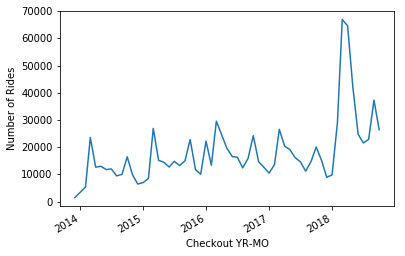

In [38]:
# Number of rides per month
groups.plot()
plt.ylabel('Number of Rides')
plt.show()

### Follow Up

From this plot, we can see a large spike in 2018, what factors could have led to this? (e.g. opening up to UT). 

A natural follow-up question then, is how does the individual Kiosk activity change? (left open if interested)

## Example 2: Mapping Kiosks

Resource for the following: https://python-visualization.github.io/folium/quickstart.html#Getting-Started

In [39]:
# Installing folium for nice map visualizations
!pip install folium

You are using pip version 9.0.3, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [40]:
import folium

In [41]:
# first extract the kiosk locations
df_kiosks = df[['Checkout Kiosk','Checkout Latitude','Checkout Longitude']].drop_duplicates()
df_kiosks.reset_index(drop=True, inplace=True)
df_kiosks.head()

,Checkout Kiosk,Checkout Latitude,Checkout Longitude
0,West & 6th St.,30.27041,-97.75046
1,Convention Center / 4th St. @ MetroRail,30.26483,-97.73900
2,8th & Congress,30.26980,-97.74186
3,East 11th St. & San Marcos,30.26968,-97.73074
4,South Congress & Elizabeth,30.24891,-97.75019


In [43]:
# Creating a map of all kiosks
m = folium.Map(
    location=[df_kiosks['Checkout Latitude'].mean(),df_kiosks['Checkout Longitude'].mean()],
    zoom_start=14,
)

for i in range(len(df_kiosks)):
    folium.Marker([df_kiosks['Checkout Latitude'][i],df_kiosks['Checkout Longitude'][i]], 
                   tooltip = df_kiosks['Checkout Kiosk'][i]).add_to(m)
m

### Follow Up

Related to the previous example, you could now adjust the size of the markers based on volume of trips...

## Example 3: Mapping Trajectories over a Single Month

Resource: https://deparkes.co.uk/2016/06/03/plot-lines-in-folium/

In [44]:
# Get all trajectories for checkout year/month 2014 october
df_mo = df[df['Checkout YR-MO'] == '2014-10-01']
df_mo.reset_index(inplace=True)
df_mo.head()

,index,Trip ID,Membership Type,Bicycle ID,Checkout Kiosk ID,Checkout Kiosk,Return Kiosk ID,Return Kiosk,Trip Duration Minutes,Checkout DateTime,Checkout Latitude,Checkout Longitude,Return Latitude,Return Longitude,Checkout YR-MO
0,0,9900285854,Annual (San Antonio B-cycle),207.0,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,76,2014-10-26 13:12:00,30.27041,-97.75046,30.25579,-97.73982,2014-10-01
1,1,9900288020,24-Hour Kiosk (Austin B-cycle),190.0,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,12,2014-10-30 19:12:00,30.27041,-97.75046,30.25579,-97.73982,2014-10-01
2,253,9900267860,Annual Membership (Austin B-cycle),772.0,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,15,2014-10-04 10:12:00,30.27041,-97.75046,30.25579,-97.73982,2014-10-01
3,254,9900267861,Annual Membership (Austin B-cycle),470.0,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,15,2014-10-04 10:12:00,30.27041,-97.75046,30.25579,-97.73982,2014-10-01
4,255,9900271774,24-Hour Kiosk (Austin B-cycle),961.0,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,54,2014-10-06 21:12:00,30.27041,-97.75046,30.25579,-97.73982,2014-10-01


In [45]:
# For checkout at a particular kiosk, how many trips to other kiosk?
df_counts = df_mo.groupby(['Checkout Latitude', 'Checkout Longitude', 'Return Latitude', 'Return Longitude']).count()['Trip ID']
# print("Example:",df_counts[30.24891,-97.75019,30.24891,-97.75019])
# print("Max:",df_counts.max())
df_counts.head()

Checkout Latitude  Checkout Longitude  Return Latitude  Return Longitude
30.24891           -97.75019           30.24891         -97.75019           51
                                       30.25103         -97.74926            8
                                       30.25226         -97.74854           11
                                       30.25579         -97.73982           13
                                       30.25870         -97.74872           13
Name: Trip ID, dtype: int64

In [46]:
for i in range(len(df_counts)):
    print(df_counts.index[i])

(30.24891, -97.75019, 30.24891, -97.75019)
(30.24891, -97.75019, 30.25103, -97.74926)
(30.24891, -97.75019, 30.25226, -97.74854)
(30.24891, -97.75019, 30.25579, -97.73982)
(30.24891, -97.75019, 30.2587, -97.74872)
(30.24891, -97.75019, 30.25941, -97.74971)
(30.24891, -97.75019, 30.25971, -97.75346)
(30.24891, -97.75019, 30.26019, -97.73845)
(30.24891, -97.75019, 30.262, -97.76118)
(30.24891, -97.75019, 30.26217, -97.72743)
(30.24891, -97.75019, 30.263040000000004, -97.75824)
(30.24891, -97.75019, 30.26408, -97.74355)
(30.24891, -97.75019, 30.26416, -97.73289)
(30.24891, -97.75019, 30.26446, -97.75665)
(30.24891, -97.75019, 30.26452, -97.7712)
(30.24891, -97.75019, 30.26461, -97.73049)
(30.24891, -97.75019, 30.26476, -97.74678)
(30.24891, -97.75019, 30.26483, -97.739)
(30.24891, -97.75019, 30.266340000000003, -97.74378)
(30.24891, -97.75019, 30.26717, -97.75484)
(30.24891, -97.75019, 30.26735, -97.73933)
(30.24891, -97.75019, 30.267740000000003, -97.74692)
(30.24891, -97.75019, 30.2678,

In [47]:
for i in range(len(df_counts)):
    checkout_lat, checkout_lon, return_lat, return_lon = df_counts.index[i]


In [48]:
df_kiosks['Checkout Latitude'].min(), df_kiosks['Checkout Latitude'].max()

(30.24258, 30.294390000000003)

In [49]:
m = folium.Map(
    location=[df_kiosks['Checkout Latitude'].mean(),df_kiosks['Checkout Longitude'].mean()],
    zoom_start=14,
    tiles='Stamen Terrain'
)

for i in range(len(df_counts)):
    start_lat, start_lon, end_lat, end_lon = df_counts.index[i]
    folium.PolyLine([(start_lat, start_lon),
                    (end_lat,end_lon)], color="red", weight=2.5, opacity=df_counts[i]/df_counts.max()).add_to(m)
m

### Follow Up:

Now do you think the trajectories change over time?